In [1]:
import pandas as pd
from plotnine import *
import statsmodels.formula.api as smf

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Load data



In [2]:
from plotnine.data import mtcars
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Exploratory Data Analysis

In [3]:
# correlation matrix of mtcars
mtcars.corr().round(1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


In [4]:
# some plots with fuel efficiency as the dependent variable
# you can modify or copy/paste this as needed if you want
# to observe relationships in these variables visually
to_plot = mtcars.melt(id_vars=['name','mpg'])

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


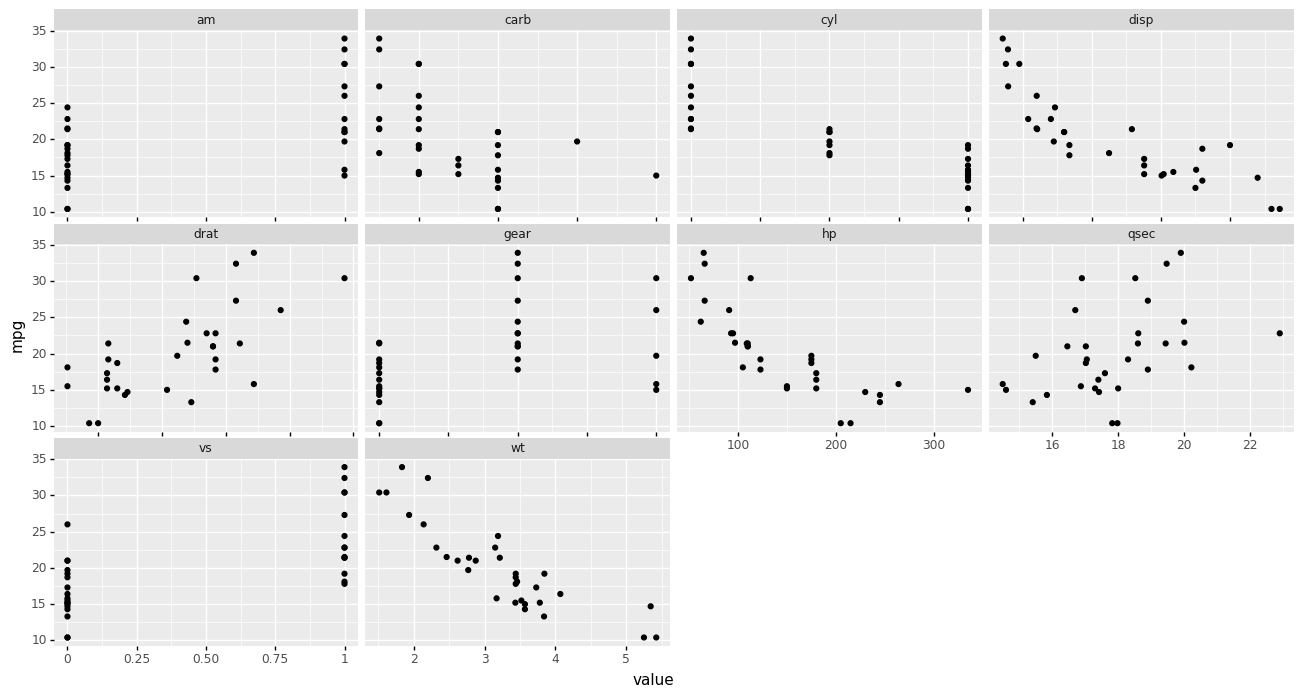

<ggplot: (371358139)>

In [5]:
(
    ggplot(to_plot, aes(x='value', y='mpg')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [ ]:
# Empty cells below for any additional exploratory data viz you'd like to do.

In [6]:
mtcars.head(2)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [7]:
wt_plot = mtcars.melt(id_vars=['name','wt'])

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


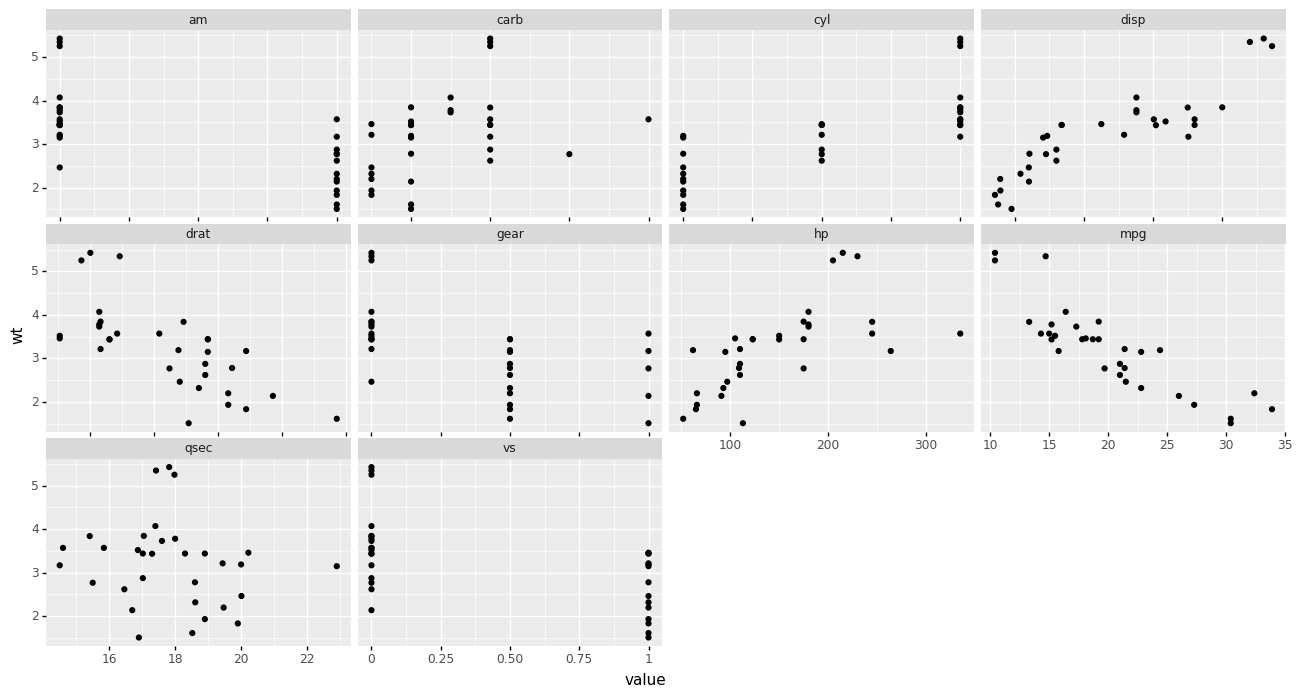

<ggplot: (371773928)>

In [8]:
(
    ggplot(wt_plot, aes(x='value', y='wt')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [9]:
disp_plot = mtcars.melt(id_vars=['disp','mpg'])

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


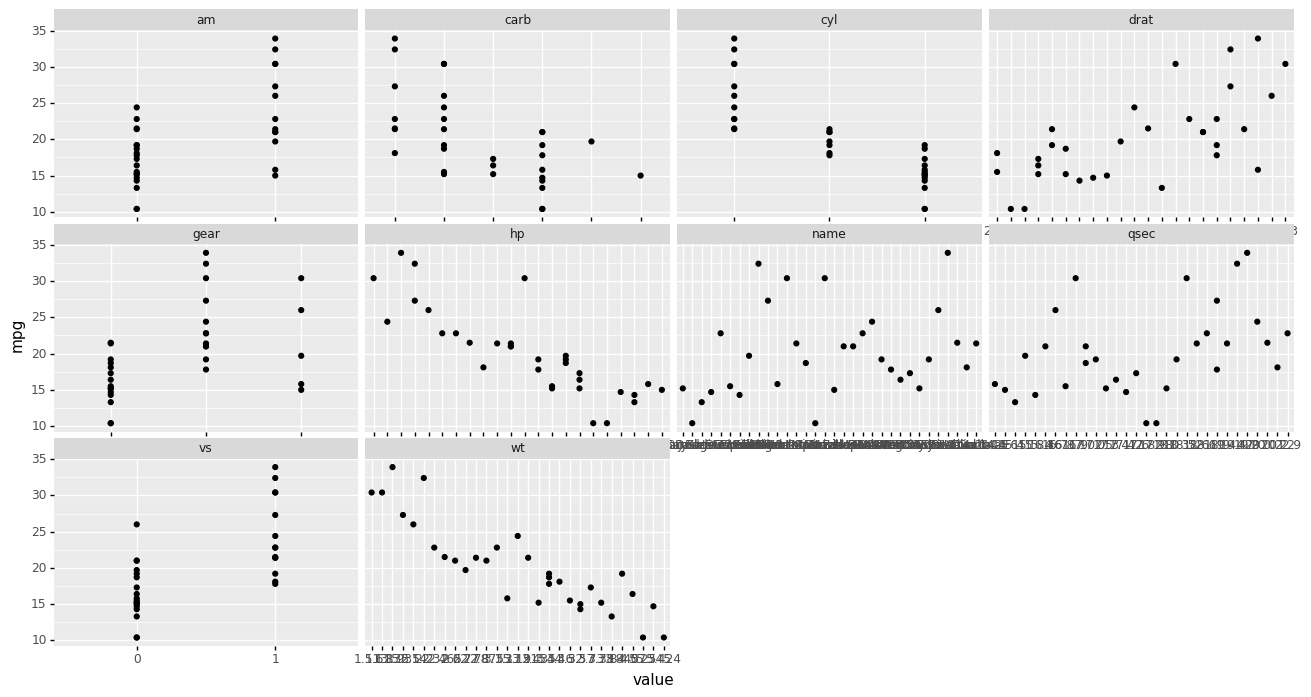

<ggplot: (372085649)>

In [10]:
(
    ggplot(disp_plot, aes(x='value', y='mpg')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [11]:
hp_plot = mtcars.melt(id_vars=['name','hp'])

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


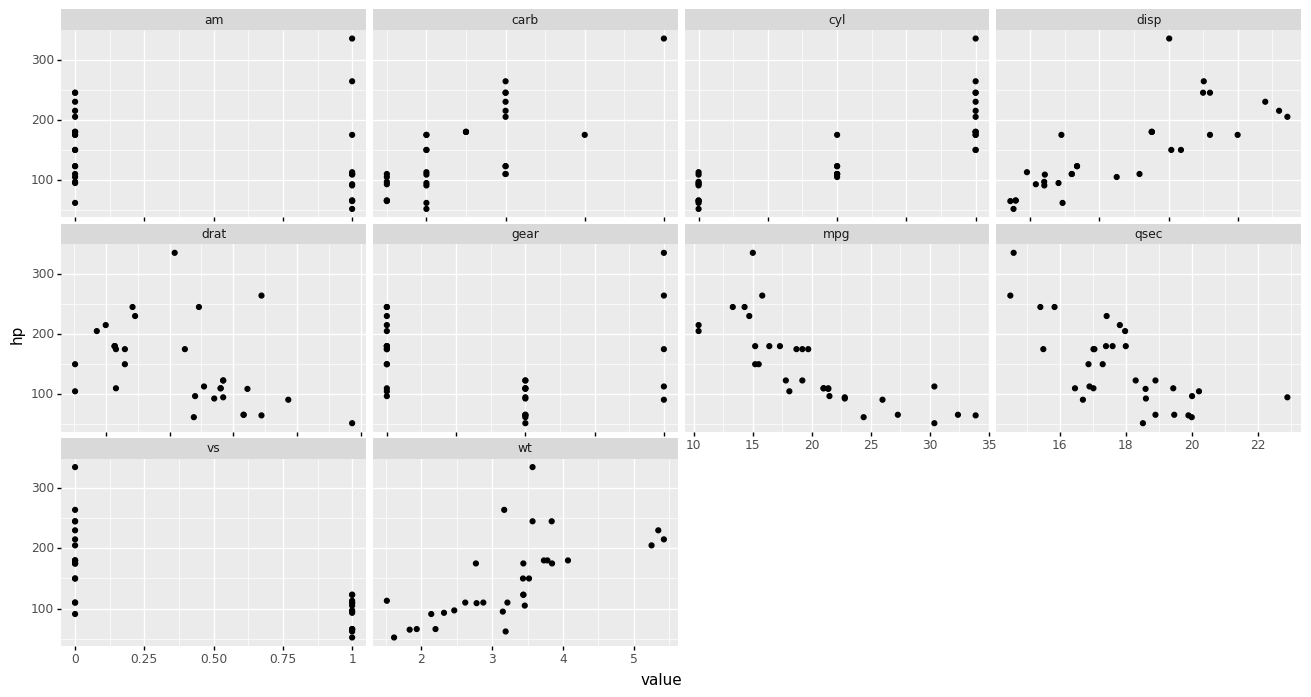

<ggplot: (371687223)>

In [12]:
(
    ggplot(hp_plot, aes(x='value', y='hp')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [13]:
qsec_plot = mtcars.melt(id_vars=['qsec','mpg'])

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


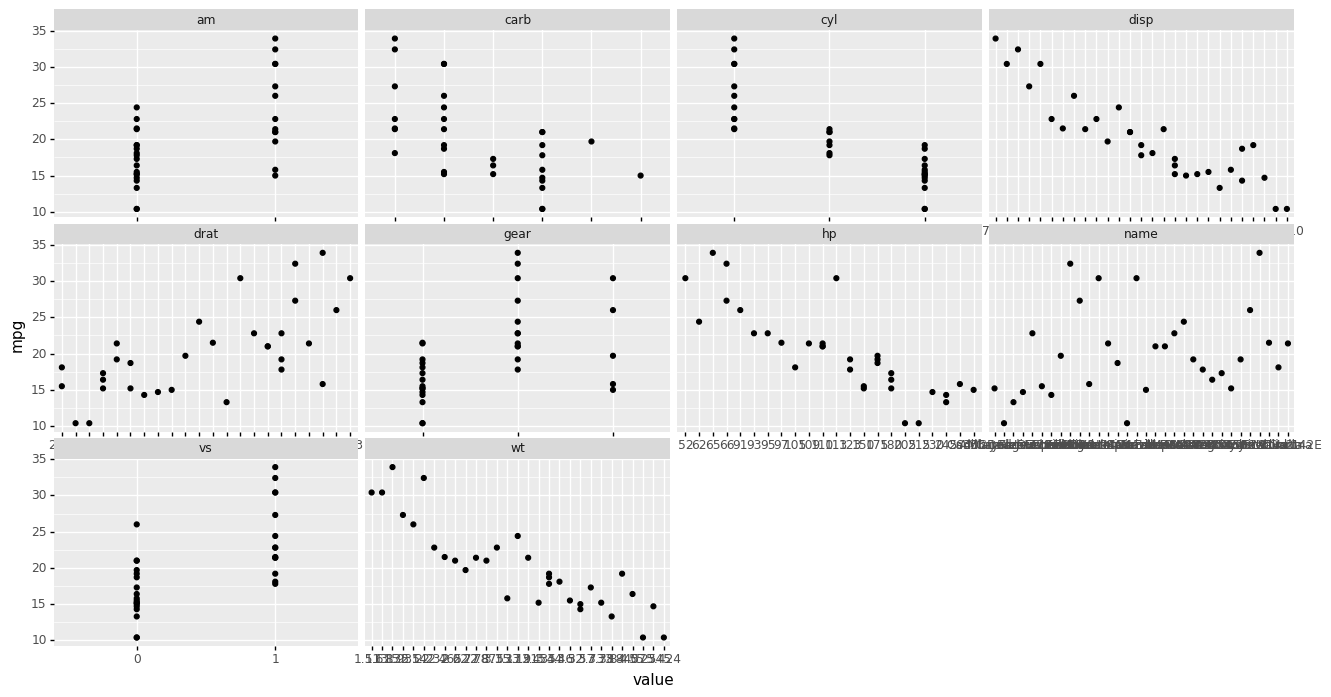

<ggplot: (372494867)>

In [14]:
(
    ggplot(qsec_plot, aes(x='value', y='mpg')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [15]:
q_plot = mtcars.melt(id_vars=['mpg','qsec'])

/Users/stephenanti/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


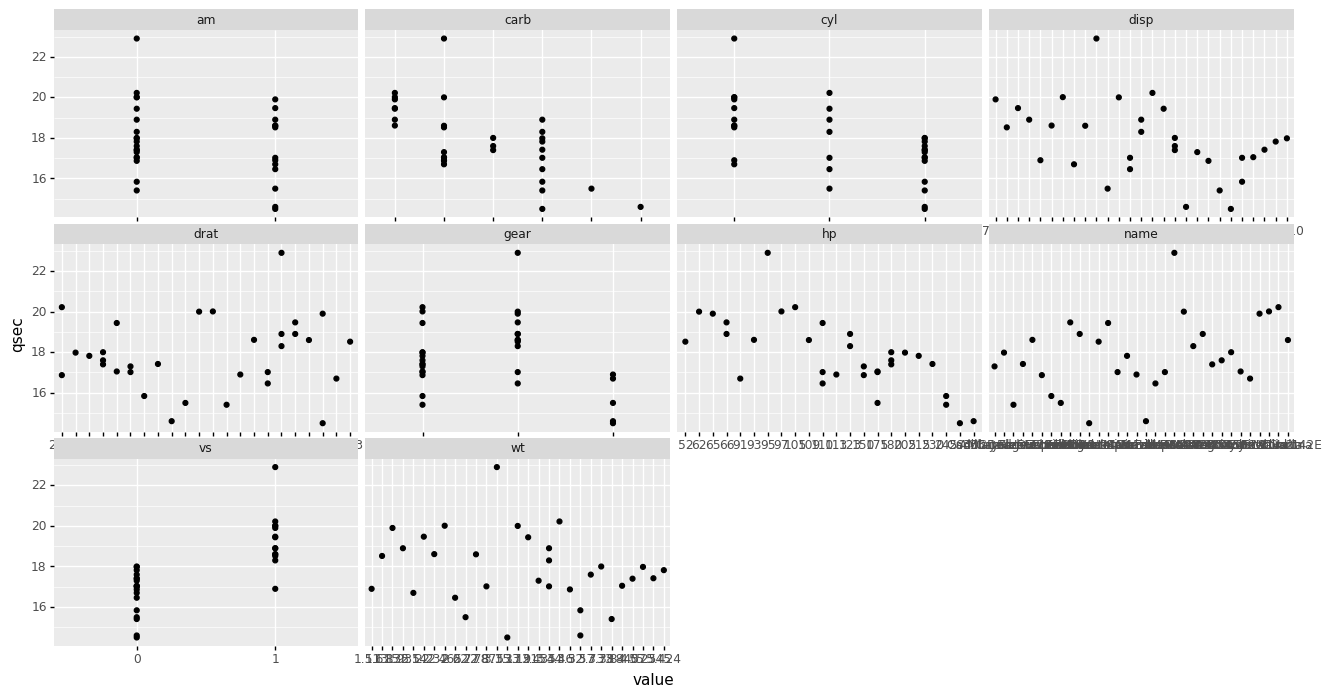

<ggplot: (372606510)>

In [16]:
(
    ggplot(q_plot, aes(x='value', y='qsec')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

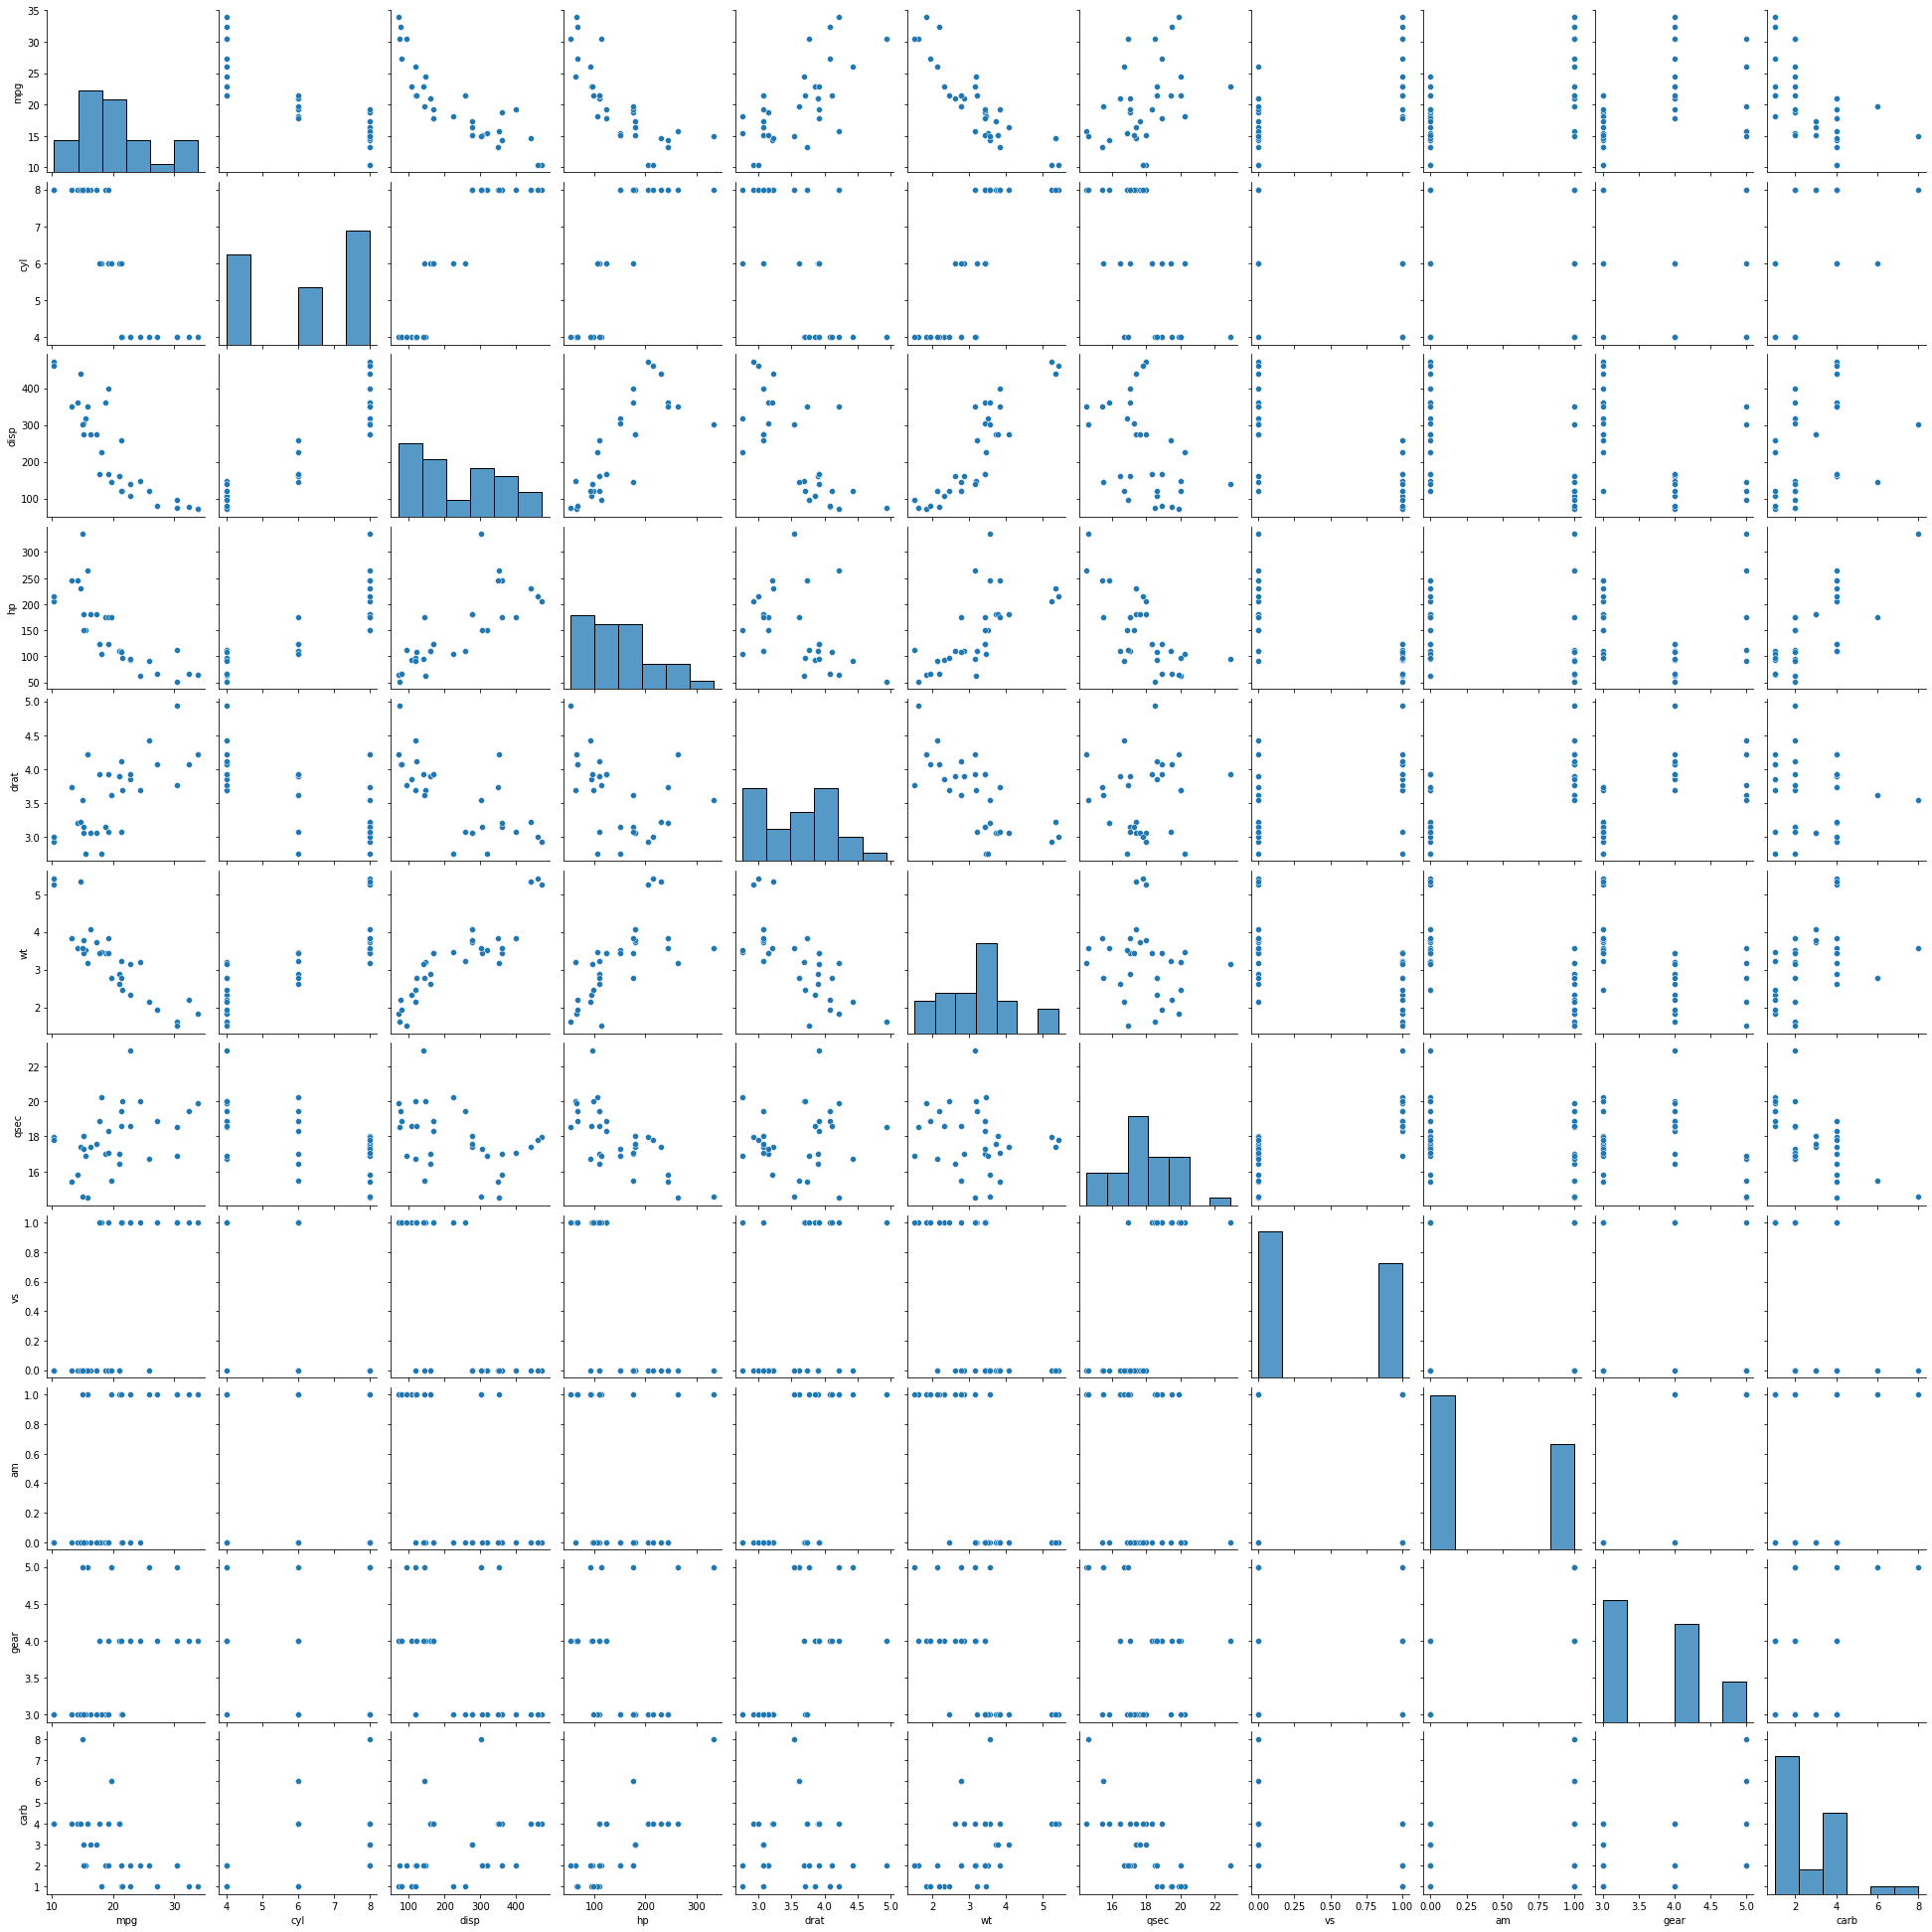

In [17]:
# Pairplots...(uncomment to see this neat trick that Plotnine doesn't support yet)
import seaborn as sns
sns.pairplot(mtcars)

# Regression models

In [18]:
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

import statsmodels.formula.api as smf

model = smf.ols("mpg ~ wt + disp", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.74e-10
Time:                        07:51:12   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9606      2.165     16.151      0.000      30.534      39.388
wt            -3.3508      1.164     -2.878      0.007      -5.732      -0.970
disp          -0.0177      0.009     -1.929      0.064      -0.037       0.001
==============================================================================
Omnibus:                        4.079   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.665
Skew:                           0.812   Prob(JB):                        0.160
Kurtosis:                       2.666   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

👉 In the cells below, use either forward or backward selection to identify a model that fits this data and best explains the differences in a car's fuel efficiency. You can try various different models, see how they perform.

Remember, these aren't just abstract numbers in a vacuum. They are real data about real cars. Each variable has a meaning. Before just dropping it in your regression, as yourself what it means to explain the variance in `mpg` using that variable. Does that **methodological choice** make sense? 

In [19]:
model = smf.ols("mpg ~ wt + disp + hp", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           8.65e-11
Time:                        07:57:26   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:

model = smf.ols("mpg ~ wt + disp + hp + wt:disp", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     46.67
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           9.51e-12
Time:                        07:59:50   Log-Likelihood:                -69.278
No. Observations:                  32   AIC:                             148.6
Df Residuals:                      27   BIC:                             155.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2941      2.922     15.160      0.000      38.299      50.289
wt            -6.3549      1.230     -5.168      0.000      -8.878      -3.832
disp          -0.0381      0.015     -2.575      0.016      -0.069      -0.008
hp            -0.0230      0.010     -2.241      0.033      -0.044      -0.002
wt:disp        0.0099      0.003      3.163      0.004       0.003       0.016
==============================================================================
Omnibus:                        2.372   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.144
Skew:                           0.563   Prob(JB):                        0.342
Kurtosis:                       2.417   Cond. No.                     8.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
mtcars.head(2)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [22]:

model = smf.ols("mpg ~ wt + disp + qsec:cyl", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     35.91
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           9.84e-10
Time:                        08:00:30   Log-Likelihood:                -77.121
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      28   BIC:                             168.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8659      3.071     12.330      0.000      31.575      44.157
wt            -2.8517      1.210     -2.356      0.026      -5.331      -0.372
disp          -0.0099      0.011     -0.916      0.367      -0.032       0.012
qsec:cyl      -0.0581      0.044     -1.318      0.198      -0.148       0.032
==============================================================================
Omnibus:                        3.674   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.031
Skew:                           0.752   Prob(JB):                        0.220
Kurtosis:                       2.885   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model = smf.ols("mpg ~ wt + disp + hp + wt:qsec", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     32.84
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           5.19e-10
Time:                        08:00:44   Log-Likelihood:                -74.075
No. Observations:                  32   AIC:                             158.1
Df Residuals:                      27   BIC:                             165.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1186      2.133     17.401      0.000      32.742      41.495
wt            -6.1820      3.832     -1.613      0.118     -14.044       1.680
disp           0.0013      0.011      0.116      0.909      -0.021       0.024
hp            -0.0233      0.017     -1.395      0.174      -0.058       0.011
wt:qsec        0.1048      0.162      0.648      0.523      -0.227       0.437
==============================================================================
Omnibus:                        5.838   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.470
Skew:                           0.889   Prob(JB):                        0.107
Kurtosis:                       3.437   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model = smf.ols("mpg ~ wt + disp + hp + cyl + wt:qsec", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     29.16
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           7.05e-10
Time:                        08:02:51   Log-Likelihood:                -72.168
No. Observations:                  32   AIC:                             156.3
Df Residuals:                      26   BIC:                             165.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8508      2.903     14.072      0.000      34.883      46.818
wt            -3.7387      3.918     -0.954      0.349     -11.791       4.314
disp           0.0116      0.012      0.965      0.344      -0.013       0.036
hp            -0.0209      0.016     -1.294      0.207      -0.054       0.012
cyl           -1.3013      0.717     -1.814      0.081      -2.776       0.173
wt:qsec       -0.0051      0.167     -0.030      0.976      -0.348       0.338
==============================================================================
Omnibus:                        5.735   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.282
Skew:                           0.858   Prob(JB):                        0.118
Kurtosis:                       3.514   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model = smf.ols("mpg ~ wt + disp + hp + cyl + cyl:wt", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     37.83
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           3.97e-11
Time:                        08:03:37   Log-Likelihood:                -68.566
No. Observations:                  32   AIC:                             149.1
Df Residuals:                      26   BIC:                             157.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6116      5.936      9.201      0.000      42.411      66.813
wt            -9.1652      2.270     -4.038      0.000     -13.830      -4.500
disp          -0.0003      0.012     -0.030      0.977      -0.024       0.024
hp            -0.0217      0.011     -1.963      0.060      -0.044       0.001
cyl           -3.3434      0.998     -3.349      0.002      -5.395      -1.291
cyl:wt         0.8911      0.348      2.563      0.017       0.176       1.606
==============================================================================
Omnibus:                        1.893   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.516
Skew:                           0.524   Prob(JB):                        0.468
Kurtosis:                       2.806   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model = smf.ols("mpg ~ wt + disp + hp + cyl + cyl:qsec", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.50
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           6.22e-10
Time:                        08:05:23   Log-Likelihood:                -72.010
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5445      2.851     14.220      0.000      34.684      46.405
wt            -4.3290      1.390     -3.114      0.004      -7.186      -1.472
disp           0.0122      0.012      1.024      0.315      -0.012       0.037
hp            -0.0132      0.019     -0.691      0.496      -0.052       0.026
cyl           -2.1191      1.754     -1.208      0.238      -5.724       1.486
cyl:qsec       0.0524      0.103      0.509      0.615      -0.159       0.264
==============================================================================
Omnibus:                        5.290   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.823
Skew:                           0.805   Prob(JB):                        0.148
Kurtosis:                       3.526   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Paste the model that you think best explains the variance in fuel efficiency below 👉

In [29]:
# this model has the highest R-squared value
# it also has the most significant p-values
model = smf.ols("mpg ~ wt + disp + hp + cyl + cyl:wt", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     37.83
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           3.97e-11
Time:                        08:10:28   Log-Likelihood:                -68.566
No. Observations:                  32   AIC:                             149.1
Df Residuals:                      26   BIC:                             157.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6116      5.936      9.201      0.000      42.411      66.813
wt            -9.1652      2.270     -4.038      0.000     -13.830      -4.500
disp          -0.0003      0.012     -0.030      0.977      -0.024       0.024
hp            -0.0217      0.011     -1.963      0.060      -0.044       0.001
cyl           -3.3434      0.998     -3.349      0.002      -5.395      -1.291
cyl:wt         0.8911      0.348      2.563      0.017       0.176       1.606
==============================================================================
Omnibus:                        1.893   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.516
Skew:                           0.524   Prob(JB):                        0.468
Kurtosis:                       2.806   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Next steps

Woohoo! We totally understand how engineers in the 1970s designed cars right? Our regressions answered all of our questions? Time to write an article?

...As you can probably tell, we're not quite there yet.

This analysis may have answered some questions that you had but raised others.

What have you learned about each of the following variables and their impact on fuel efficiency?

- cyl (Number of Cylinders)
- disp (Displacement cu.in.)
- hp (Gross horsepower)
- drat (Rear axle ratio)
- wt (Weight)
- qsec (1/4 mile time)
- vs (Engine type - V-shape or Straight)
- am (Transmission Type - Autmoatic or Manaul)
- gear (Number of gears in the transmission)
- carb (Number of carburetor barrels)

Game out what your next steps would be. If you have the opportunity to speak to a car expert (hint: you will!) and the opportunity to speak to a stats expert (hint: you will!) what would you ask them?


## Reporting

Car design has evolved significantly since this dataset was published. Your goal is to understand what made a car fuel efficient (or not) in the 1970s/80s. What were the tradeoffs that a car maker had to make? How did those tradeoffs impact fuel effienceny? How are these variables all related to one another?

# What are 3-5 questions you have for a domain expert?
- 1. What effect does the displacement of a car(in cu.in) have on its  over-all horse power(hp)?
- 2. How do we explain the relationship between a car's number of cylinders and its weight?
- 3. It is obvious a car's weight has a direct effect on its fuel efficiency. How do we explain this?

# What are 3-5 questions you have for a statistician?
- 
- 
-